# Bubble raft

In [60]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from psm import plotutils
from psm.graph.geometric import urquhart, knn, delaunay
from psm.structures import traverse_from_all
from psm.build import lattice_traversal
from psm.register import RMSD
from psm.geometry import transform
from psm.graph.graphutils import subgraph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


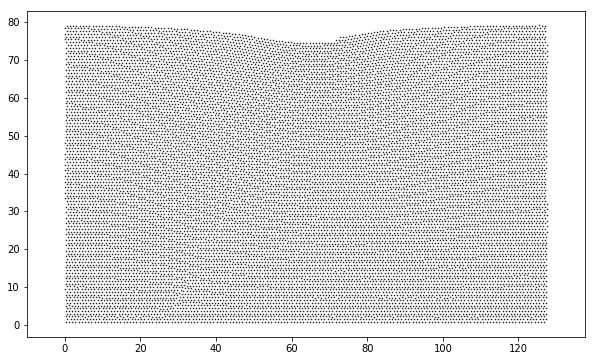

In [100]:
points = np.load('data/bubbleraft_0003.npy')

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(points[:,0], points[:,1], 'k.', markersize=1)
ax.axis('equal');

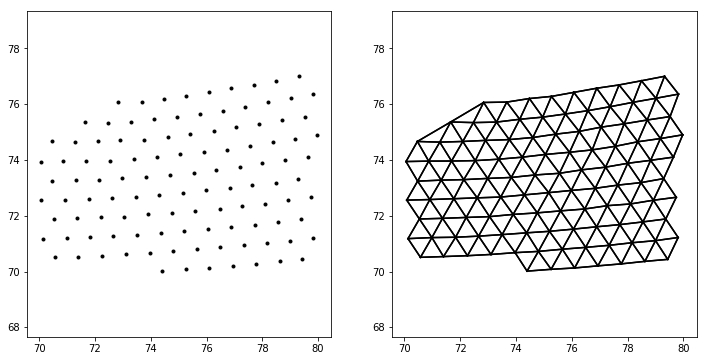

In [71]:
adjacency = delaunay(points, tol=10)

to_plot = (points[:,0]>70)&(points[:,0]<80)&(points[:,1]>70)&(points[:,1]<80)

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].plot(points[to_plot,0], points[to_plot,1], 'k.')
plotutils.graph_embedding(points[to_plot], subgraph(adjacency,to_plot), ax = axes[1])
for ax in axes:
    ax.axis('equal')

In [72]:
structures = traverse_from_all(points, adjacency, max_depth=2, progress_bar=True)

 [||||||||||||||||||||] 16200/16200 traversals


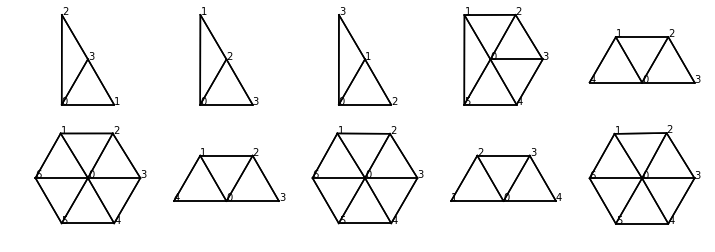

In [74]:
fig,axes = plt.subplots(2,5,figsize=(12,4))
plotutils.show_structures(structures, axes=axes.ravel(), show_order=True)
for ax in axes.ravel():
    ax.axis('equal')
    ax.axis('off')

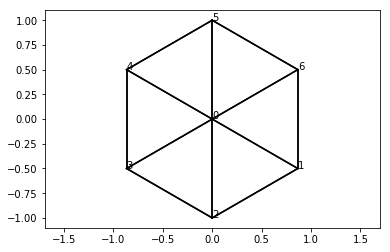

In [79]:
a = [0, 1]
b = [np.sin(2/3*np.pi), np.cos(2/3*np.pi)]

templates = lattice_traversal(a, b, max_depth=2, graph_func=delaunay)

axes = plotutils.show_structures(templates,show_order=True)
for ax in axes:
    ax.axis('equal')

In [80]:
rmsd_calc = RMSD(transform='similarity', pivot='front')
rmsd = rmsd_calc.register(templates, structures)

 [||||||||||||||||||||] 16202/16202 registrations


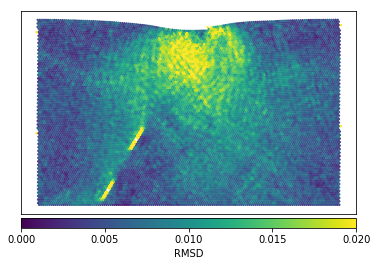

In [86]:
_, best_rmsd = rmsd_calc.best_matches(structures)

fig,ax = plt.subplots(1,1,figsize=(6,6))
p = plt.scatter(structures.fronts[:,0], structures.fronts[:,1],
            c=best_rmsd, cmap='viridis', vmin=0, vmax=.02, s=2)

plotutils.add_colorbar(p, ax, 'bottom', label='RMSD', ticks=np.linspace(0,.02,5))

ax.axis('equal')
ax.set_xticks([])
ax.set_yticks([]);

In [114]:
strain, rotation = rmsd_calc.calc_strain(structures, rmsd_max=.1)
strain = transform.zero_median(strain)

planar = transform.planar_strain(strain)
shear = strain[:,0,1]
rotation = (rotation % (np.pi/3)) / np.pi * 180 - 30

C:\Users\jacob\Anaconda3\envs\point-segment-matching\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in remainder
  


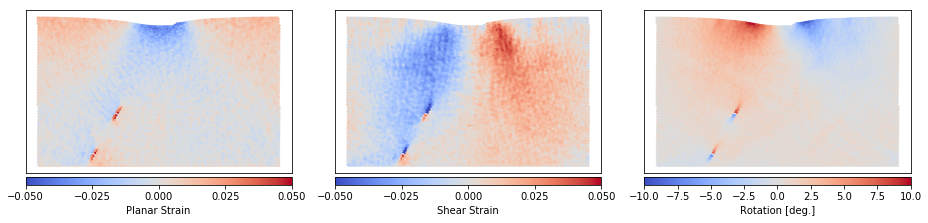

In [115]:
fig,axes = plt.subplots(1, 3, figsize=(13,6))

p = axes[0].scatter(structures.fronts[:,0], structures.fronts[:,1],
                c=planar, cmap='coolwarm', vmin=-.05, vmax=.05, s=2)
plotutils.add_colorbar(p, axes[0], 'bottom', label='Planar Strain', ticks=np.linspace(-0.05,.05,5))

p = axes[1].scatter(structures.fronts[:,0], structures.fronts[:,1],
                c=shear, cmap='coolwarm', vmin=-.05, vmax=.05, s=2)
plotutils.add_colorbar(p, axes[1], 'bottom', label='Shear Strain', ticks=np.linspace(-0.05,.05,5))

p = axes[2].scatter(structures.fronts[:,0], structures.fronts[:,1],
                c=rotation, cmap='coolwarm', s=2, vmin=-10, vmax=10)
plotutils.add_colorbar(p, axes[2], 'bottom', label='Rotation [deg.]')

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()